<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [432]:
# Import necessary libraries
import numpy as np
import torch
print(torch.__version__)

from torch import nn

import matplotlib.pyplot as plt

2.1.2+cu121


In [433]:
# Setup device-agnostic code
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(f"using {device} device")

using cuda device


## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total. 
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [434]:
torch.manual_seed(0)
# Create the data parameters
weight = 0.2
bias = 0.0

n_values =1000
start = 0
end = 1
X = torch.arange(start, end, (end-start)/n_values).unsqueeze(1)
print(X.shape)
y = weight*X + bias + torch.rand(n_values, 1)/10

# Make X and y using linear regression feature


print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

torch.Size([1000, 1])
Number of X samples: 1000
Number of y samples: 1000
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0010],
        [0.0020],
        [0.0030],
        [0.0040],
        [0.0050],
        [0.0060],
        [0.0070],
        [0.0080],
        [0.0090]])
y: tensor([[0.0496],
        [0.0770],
        [0.0092],
        [0.0138],
        [0.0315],
        [0.0644],
        [0.0502],
        [0.0910],
        [0.0472],
        [0.0650]])


In [435]:
# Split the data into training and testing

train_fraction = 0.8

X_train = X[:int(n_values*train_fraction)]
y_train = y[:int(n_values*train_fraction)]

X_test = X[int(n_values*train_fraction):]
y_test = y[int(n_values*train_fraction):]

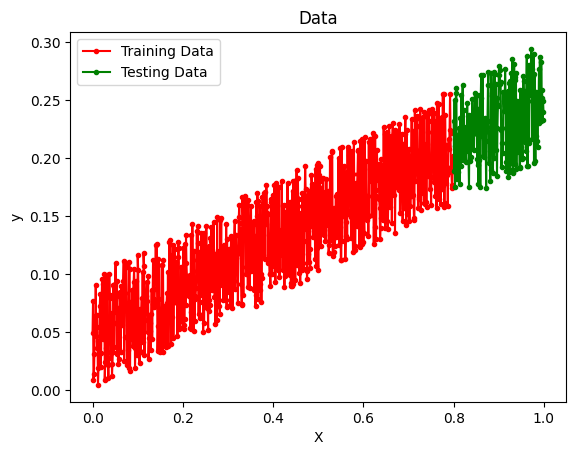

In [436]:
# Plot the training and testing data 

def plot_data(train_data = X_train,train_labels =  y_train, test_data = X_test, test_labels = y_test, prediction = None):

    plt.title("Data")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.plot(train_data, train_labels, label="Training Data", color='red', marker='.')
    plt.plot(test_data, test_labels, label="Testing Data", color='green', marker='.')


    if prediction is not None:
        plt.plot(test_data, prediction, label="Prediction", color='blue', marker='.')
        
    plt.legend()
    plt.show()



plot_data(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu())

## 2. Build a PyTorch model by subclassing `nn.Module`. 
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`. 
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1. 
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [437]:
# Create PyTorch linear regression model by subclassing nn.Module

class LinearRegression(nn.Module):
    def __init__(self,input_dim, output_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim) # linear layer (already contains weights and bias)

    def forward(self, x):
        return self.linear(x) # forward pass, computes the output Y from the input X

In [438]:
# Instantiate the model and put it to the target device

input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)
print(next(model.parameters()).device, device)
model.to(device)

print(model)
print(model.state_dict())
for par in model.parameters():\
    print(par)
for name, par in model.named_parameters():\
    print(f"   name, par    {name} {par}")


 

cpu cuda
LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
OrderedDict([('linear.weight', tensor([[-0.0850]], device='cuda:0')), ('linear.bias', tensor([-0.7799], device='cuda:0'))])
Parameter containing:
tensor([[-0.0850]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.7799], device='cuda:0', requires_grad=True)
   name, par    linear.weight Parameter containing:
tensor([[-0.0850]], device='cuda:0', requires_grad=True)
   name, par    linear.bias Parameter containing:
tensor([-0.7799], device='cuda:0', requires_grad=True)


## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [439]:
# Create the loss function and optimizer
loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001) # play with this. If set to 0.01 convergence is not so good. Try 0.001

In [440]:
# Training loop


# Train model for 300 epochs
epochs = 10000

# Send data to target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  ### Training

  # Put model in train mode
  model.train()

  # 1. Forward pass
  y_pred_train = model(X_train)

  # 2. Calculate loss
  loss = loss_function(y_pred_train, y_train.to(device))
  

  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()


  # 5. Step the optimizer
  optimizer.step()

  ### Perform testing every 20 epochs
  if epoch % 50 == 0:
    with torch.inference_mode():
      # Put model in evaluation mode and setup inference context 
      model.eval()
      # 1. Forward pass
      y_pred_test = model(X_test.to(device))
      # 2. Calculate test loss
      test_loss = loss_function(y_pred_test, y_test.to(device))

      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}| weight: {model.linear.weight.item():.3f} | bias: {model.linear.bias.item():.3f}")

     
      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}| weight: {model.linear.weight.item():.3f} | bias: {model.linear.bias.item():.3f}")
   
 

Epoch: 0 | Train loss: 0.943 | Test loss: 1.087| weight: -0.085 | bias: -0.779
Epoch: 0 | Train loss: 0.943 | Test loss: 1.087| weight: -0.085 | bias: -0.779
Epoch: 50 | Train loss: 0.885 | Test loss: 1.019| weight: -0.065 | bias: -0.729
Epoch: 50 | Train loss: 0.885 | Test loss: 1.019| weight: -0.065 | bias: -0.729
Epoch: 100 | Train loss: 0.827 | Test loss: 0.951| weight: -0.045 | bias: -0.679
Epoch: 100 | Train loss: 0.827 | Test loss: 0.951| weight: -0.045 | bias: -0.679
Epoch: 150 | Train loss: 0.769 | Test loss: 0.883| weight: -0.025 | bias: -0.629
Epoch: 150 | Train loss: 0.769 | Test loss: 0.883| weight: -0.025 | bias: -0.629
Epoch: 200 | Train loss: 0.712 | Test loss: 0.815| weight: -0.005 | bias: -0.579
Epoch: 200 | Train loss: 0.712 | Test loss: 0.815| weight: -0.005 | bias: -0.579
Epoch: 250 | Train loss: 0.654 | Test loss: 0.747| weight: 0.015 | bias: -0.529
Epoch: 250 | Train loss: 0.654 | Test loss: 0.747| weight: 0.015 | bias: -0.529


Epoch: 300 | Train loss: 0.596 | Test loss: 0.679| weight: 0.035 | bias: -0.479
Epoch: 300 | Train loss: 0.596 | Test loss: 0.679| weight: 0.035 | bias: -0.479
Epoch: 350 | Train loss: 0.538 | Test loss: 0.611| weight: 0.055 | bias: -0.429
Epoch: 350 | Train loss: 0.538 | Test loss: 0.611| weight: 0.055 | bias: -0.429
Epoch: 400 | Train loss: 0.480 | Test loss: 0.543| weight: 0.075 | bias: -0.379
Epoch: 400 | Train loss: 0.480 | Test loss: 0.543| weight: 0.075 | bias: -0.379
Epoch: 450 | Train loss: 0.422 | Test loss: 0.475| weight: 0.095 | bias: -0.329
Epoch: 450 | Train loss: 0.422 | Test loss: 0.475| weight: 0.095 | bias: -0.329
Epoch: 500 | Train loss: 0.364 | Test loss: 0.407| weight: 0.115 | bias: -0.279
Epoch: 500 | Train loss: 0.364 | Test loss: 0.407| weight: 0.115 | bias: -0.279
Epoch: 550 | Train loss: 0.306 | Test loss: 0.339| weight: 0.135 | bias: -0.229
Epoch: 550 | Train loss: 0.306 | Test loss: 0.339| weight: 0.135 | bias: -0.229
Epoch: 600 | Train loss: 0.248 | Test lo

## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [441]:
# Make predictions with the model
model.eval()
print(model.state_dict())
y_pred = model(X_test)
print(y_pred)
y_pred = y_pred.detach().cpu()
print(y_pred - y_test.cpu())

OrderedDict([('linear.weight', tensor([[0.2012]], device='cuda:0')), ('linear.bias', tensor([0.0491], device='cuda:0'))])
tensor([[0.2101],
        [0.2103],
        [0.2105],
        [0.2107],
        [0.2109],
        [0.2111],
        [0.2113],
        [0.2115],
        [0.2117],
        [0.2119],
        [0.2121],
        [0.2123],
        [0.2125],
        [0.2127],
        [0.2129],
        [0.2131],
        [0.2133],
        [0.2135],
        [0.2137],
        [0.2139],
        [0.2141],
        [0.2143],
        [0.2145],
        [0.2147],
        [0.2149],
        [0.2151],
        [0.2153],
        [0.2155],
        [0.2157],
        [0.2159],
        [0.2161],
        [0.2163],
        [0.2165],
        [0.2167],
        [0.2169],
        [0.2171],
        [0.2173],
        [0.2175],
        [0.2177],
        [0.2179],
        [0.2181],
        [0.2183],
        [0.2185],
        [0.2187],
        [0.2189],
        [0.2191],
        [0.2193],
        [0.2195],
        [0.219

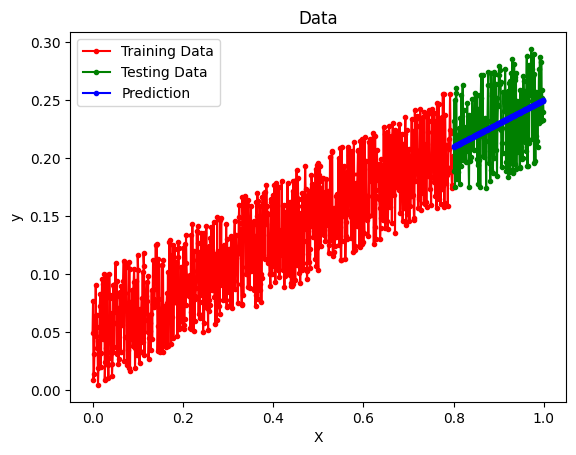

In [442]:
# Plot the predictions (these may need to be on a specific device)
plot_data(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu(),y_pred.cpu())

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [443]:
from pathlib import Path

# 1. Create models directory 
MODEL_DIR = Path('models')
MODEL_DIR.mkdir(parents=True, exist_ok=True)


# 2. Create model save path 
MODEL_NAME = 'linear_regression.pth'
MODEL_SAVE_PATH = Path('models/linear_regression.pth')
# 3. Save the model state dict
torch.save(obj = model.state_dict(),f = MODEL_SAVE_PATH)

In [444]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
model_reload = LinearRegression(input_dim, output_dim)
model_reload.load_state_dict(torch.load(MODEL_SAVE_PATH))
model_reload.to(device)

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [445]:
# Make predictions with loaded model and compare them to the previous

model_reload.eval()
print(model_reload.state_dict())
y_pred = model_reload(X_test)
y_pred = y_pred.detach().cpu()
print(y_pred)
print(y_pred - y_test.cpu())

OrderedDict([('linear.weight', tensor([[0.2012]], device='cuda:0')), ('linear.bias', tensor([0.0491], device='cuda:0'))])
tensor([[0.2101],
        [0.2103],
        [0.2105],
        [0.2107],
        [0.2109],
        [0.2111],
        [0.2113],
        [0.2115],
        [0.2117],
        [0.2119],
        [0.2121],
        [0.2123],
        [0.2125],
        [0.2127],
        [0.2129],
        [0.2131],
        [0.2133],
        [0.2135],
        [0.2137],
        [0.2139],
        [0.2141],
        [0.2143],
        [0.2145],
        [0.2147],
        [0.2149],
        [0.2151],
        [0.2153],
        [0.2155],
        [0.2157],
        [0.2159],
        [0.2161],
        [0.2163],
        [0.2165],
        [0.2167],
        [0.2169],
        [0.2171],
        [0.2173],
        [0.2175],
        [0.2177],
        [0.2179],
        [0.2181],
        [0.2183],
        [0.2185],
        [0.2187],
        [0.2189],
        [0.2191],
        [0.2193],
        [0.2195],
        [0.219